In [1]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

In [2]:
df = pd.read_csv("sim_data_full_v2.csv")

In [3]:
df

,archetype,baseline_eir,scenario_number,iptsc_rdts_used,iptsc_drugs_used,cases_treated,severe_cases_treated,received_smc,received_ivermectin,received_primaquine,...,cost_primaquine,num_children_receiving_SMC_annually,cost_SMC_low,cost_SMC_high,cost_SMC_mean,cost_mean,cost_low_IPTsc_only,cost_high_IPTsc_only,cost_low,cost_high
0,Central,1,0,0.0,6020.0,4388.8,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,56392.258667,54365.525333,58418.992,54365.525333,58418.992
1,Central,3,0,0.0,5934.2,4751.8,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,60251.388667,58253.541333,62249.236,58253.541333,62249.236
2,Central,10,0,0.0,6271.2,6570.2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,80260.528000,78149.224000,82371.832,78149.224000,82371.832
3,Central,30,0,0.0,6115.6,7664.4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,91984.209333,89925.290667,94043.128,89925.290667,94043.128
4,Central,100,0,0.0,6222.2,9609.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,113157.836667,111063.029333,115252.644,111063.029333,115252.644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,Southern,1,55,0.0,5753.0,682.8,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,15983.368667,14046.525333,17920.212,14046.525333,17920.212
876,Southern,3,55,0.0,5917.2,1910.8,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,29439.932000,27447.808000,31432.056,27447.808000,31432.056
877,Southern,10,55,0.0,5753.6,3109.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,42283.906667,40346.861333,44220.952,40346.861333,44220.952
878,Southern,30,55,0.0,5874.8,4542.8,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,57933.358667,55955.509333,59911.208,55955.509333,59911.208


In [25]:
scenarios_to_plot = [13,35,36]
df_smcplot = df[np.logical_and.reduce([df["archetype"]=="Sahel",
                                       df["baseline_eir"]==10,
                                       np.in1d(df["scenario_number"], scenarios_to_plot)])]

In [32]:
full_col_list = list(df_smcplot.columns)
cost_col_list = [c for c in full_col_list if "cost_" in c and "_cost_" not in c]
cost_col_list = [
 'cost_IPTsc_commodities',
 'cost_facility',
 'cost_severe',
 'cost_ITNs',
 'cost_SMC_low',
 'cost_SMC_high',
 'cost_SMC_mean',
 'cost_mean',
 'cost_low_IPTsc_only',
 'cost_high_IPTsc_only',
 'cost_low',
 'cost_high']
cost_col_list 


['cost_IPTsc_commodities',
 'cost_facility',
 'cost_severe',
 'cost_ITNs',
 'cost_SMC_low',
 'cost_SMC_high',
 'cost_SMC_mean',
 'cost_mean',
 'cost_low_IPTsc_only',
 'cost_high_IPTsc_only',
 'cost_low',
 'cost_high']

In [33]:
df_smcplot_to_melt = df_smcplot[["scenario_number", "baseline_eir"]+cost_col_list]

In [34]:
df_smcplot_bar = df_smcplot_to_melt.melt(id_vars=["scenario_number", "baseline_eir"], var_name="cost_type", value_name="cost")

In [39]:
list(df.columns)

['archetype',
 'baseline_eir',
 'scenario_number',
 'iptsc_rdts_used',
 'iptsc_drugs_used',
 'cases_treated',
 'severe_cases_treated',
 'received_smc',
 'received_ivermectin',
 'received_primaquine',
 'pfpr0_5',
 'pfpr2_10',
 'pfpr6_15',
 'pfpr16_500',
 'pfpr_all',
 'clinical_incidence0_5',
 'clinical_incidence2_10',
 'clinical_incidence6_15',
 'clinical_incidence16_500',
 'clinical_incidence_all',
 'severe_incidence0_5',
 'severe_incidence2_10',
 'severe_incidence6_15',
 'severe_incidence16_500',
 'severe_incidence_all',
 'pop0_5',
 'pop2_10',
 'pop6_15',
 'pop16_500',
 'pop_all',
 'avg_age',
 'avg_age_clinical_cases',
 'avg_age_severe_cases',
 'Run_Number',
 'iptsc_rdts_used_STDEV',
 'iptsc_drugs_used_STDEV',
 'cases_treated_STDEV',
 'severe_cases_treated_STDEV',
 'received_smc_STDEV',
 'received_ivermectin_STDEV',
 'received_primaquine_STDEV',
 'pfpr0_5_STDEV',
 'pfpr2_10_STDEV',
 'pfpr6_15_STDEV',
 'pfpr16_500_STDEV',
 'pfpr_all_STDEV',
 'clinical_incidence0_5_STDEV',
 'clinical_in

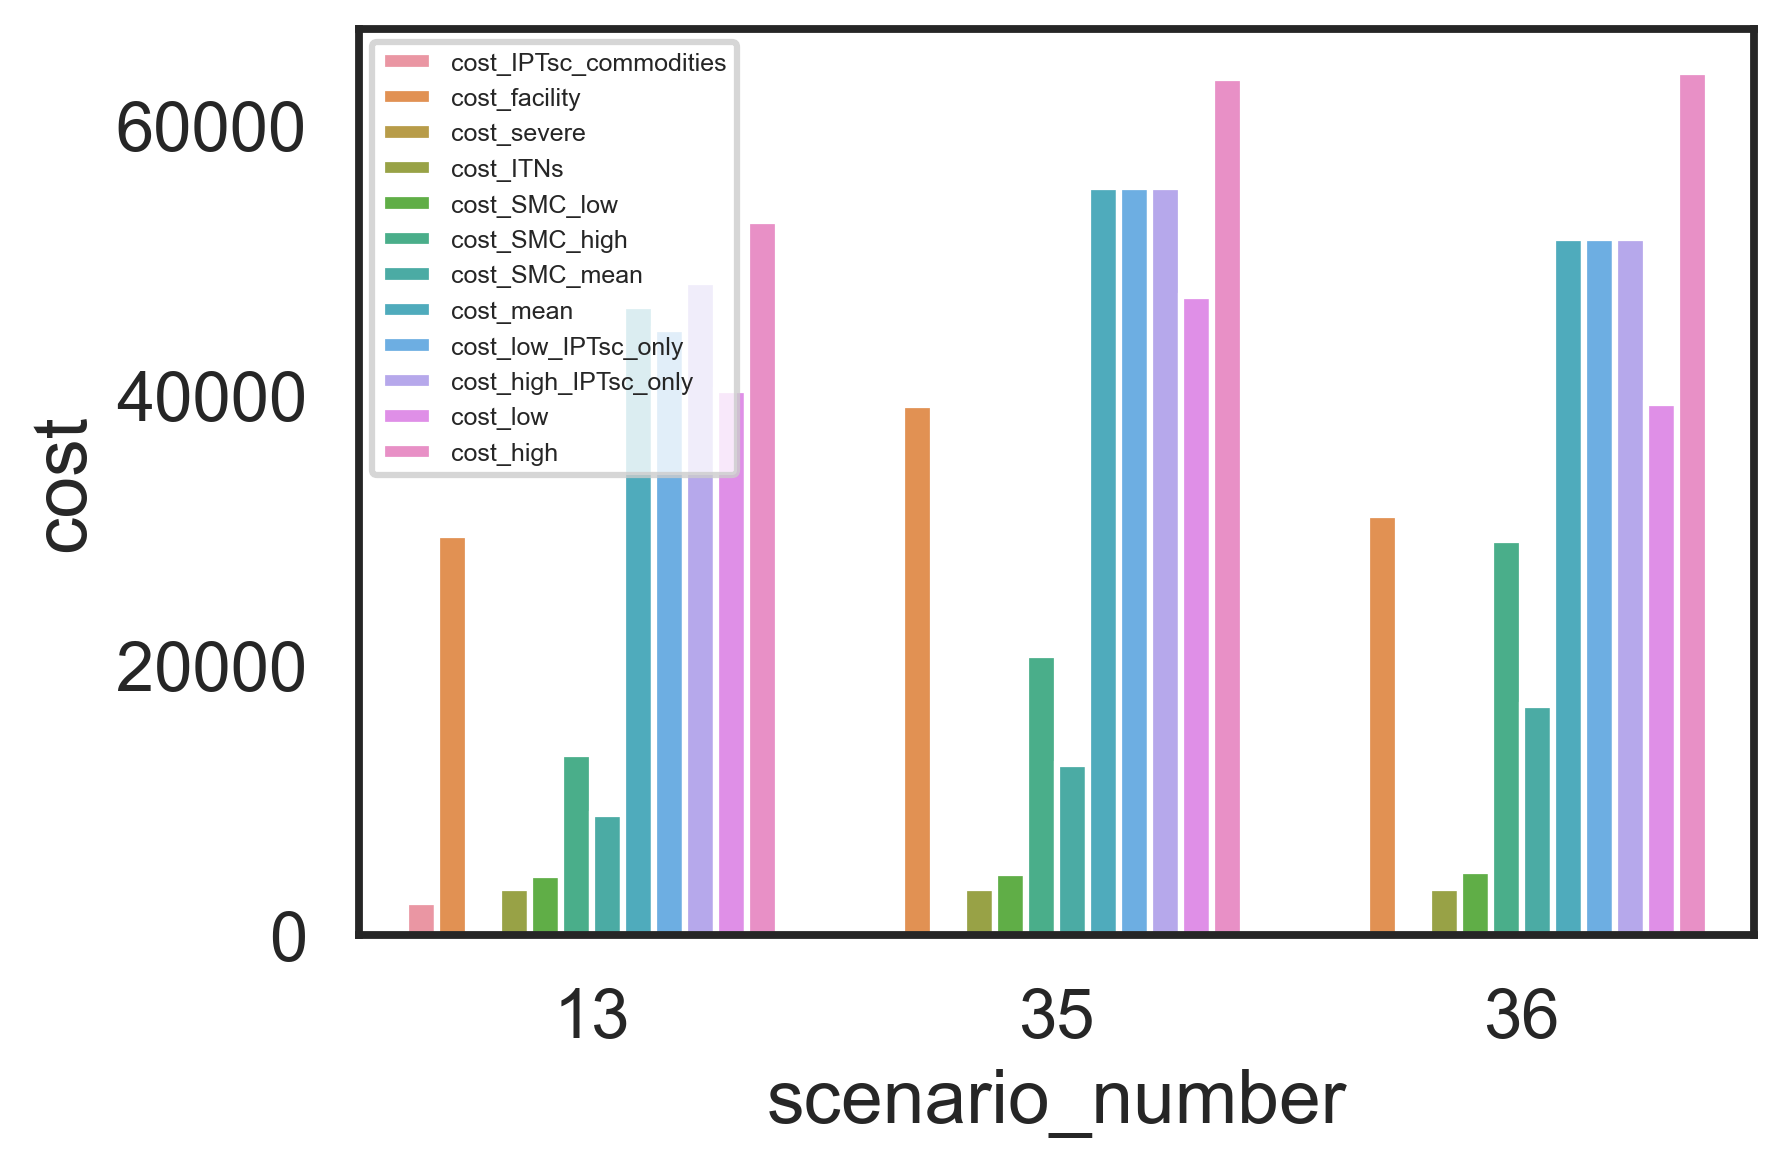

In [38]:
plt.figure(dpi=300)
sns.barplot(data=df_smcplot_bar, x="scenario_number", y="cost", hue="cost_type")
plt.legend(fontsize=6)

In [42]:
test = df_smcplot_bar[df_smcplot_bar["scenario_number"]==13]

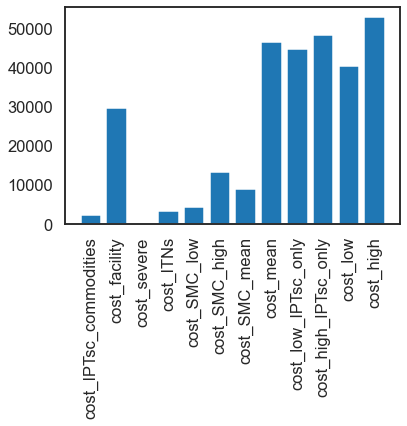

In [47]:
index = np.arange(len(test)) + 0.3
bar_width = 0.4
plt.figure()
ax = plt.gca()
plt.bar(x=index, height=test["cost"])
ax.set_xticks(index, labels=test['cost_type'], rotation=90)
